In [57]:
import numpy as np
from matplotlib import pyplot as plt
#This is an example of Overdamed Langevin Dynamics on a 2-D potential 
#I will generalize this code later but for now this is a hardedcoded 2-D
#define the double well potential in x and y
def V(r):
    return ((1.0-r[0]**2)**2) + r[1]**2
#Gradient of Potential Function 
def dVdx(r) :
    return -4*r[0]*(1-r[0]**2)
 
def dVdy(r) :
    return 2*r[1]

#Initialize Arrays 
Gamma = np.zeros([2,2])
r_new = np.zeros([2])
variance = np.zeros([2,2])
sigma = np.zeros([2,2])
gradV = np.zeros([2])
factor = np.zeros([2,2])
bivar = np.zeros([2])

#define parameters for trajectory 
t_start = 0.0 
steps = 100
dt = .1 

r_start = np.array([1.,0.])
r_store = np.empty([steps,2])
m = 1 
beta = 2.0 
#Gamma is a diagonal matrix with friction coeff. 
Gamma[0,0] = 200.
Gamma[1,1] = 200. 

#=============== VARIANCE =================#
#covariance of the multivariate noise is given by
# matrix of (2*k*T*dT)/(m*gamma[i,i]*beta)
variance[0,0] = 2 * dt / (m*Gamma[0,0]*beta)
variance[1,1] = 2 * dt / (m*Gamma[1,1]*beta)
#standard deviation
sigma = variance**.5

#=============== PROPAGATION ==============#
# r(j+1) = r(j) - (kT*dt/(m*Gamma))*(dV/dr) + rrand

r = r_start
f1 = open("traj.out","w")
print >>f1, r[0], r[1], V([r[0],r[1]])
factor[0,0] = dt / (m*Gamma[0,0])
factor[1,1] = dt / (m*Gamma[1,1])


for i in range(steps):
    gradV[0] = dVdx(r)
    gradV[1] = dVdy(r)
    bivar = np.random.multivariate_normal([0,0],sigma)
    rnew= r - np.dot(factor,gradV) + bivar
    r = rnew
    print >>f1, r[0], r[1], V([r[0],r[1]])
    #r_store[i] = rnew
f1.close()    
print "done"

done


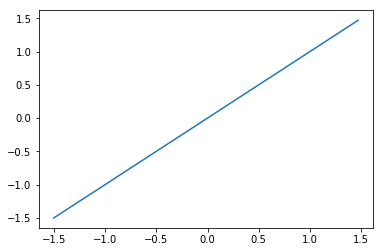

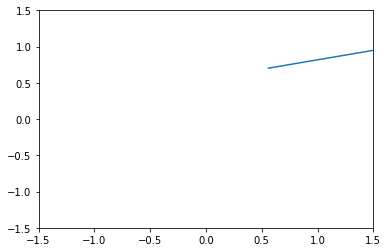

In [35]:
plt.xlim((-1.5),(1.5))
plt.ylim((-1.5),(1.5))
plt.plot(r_store[0],r_store[1])
plt.show()